### Importação de bibliotecas

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import json

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [5]:
!pip install spacy
!python -m spacy download en_core_web_sm

2022-04-28 12:42:53.194236: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-28 12:42:53.194297: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\vitor\appdata\local\temp\pip-req-build-3i41vu70
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7692 sha256=eb988fbda44f6b2f29143d680ea2dbf234044fa60fb77548b6646a51e4c71da2
  Stored in directory: C:\Users\vitor\AppData\Local\Temp\pip-ephem-wheel-cache-zhw02x18\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\vitor\AppData\Local\Temp\pip-req-build-3i41vu70'


In [7]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


### Importação do Corpus Português-Br

In [8]:
true=[]
for i in range(1,3601):
  with open(r'C:\Users\vitor\Documents\TCC.v3\Software\Fake.br-Corpus\full_texts\true\\'+str(i)+'.txt', encoding ="utf8") as t:
    true.append(t.read())

In [9]:
df_true = pd.DataFrame(true, columns = ['texto'])

In [10]:
print(df_true)

                                                  texto
0     ﻿O Podemos decidiu  expulsar o deputado federa...
1     Em evento realizado nesta terça-feira para div...
2     ﻿Após o prefeito de Manaus Arthur Virgílio (PS...
3     ﻿Doria vai receber Zé Celso após reunião com r...
4     Gustavo Pedreira Ferraz, que admitiu buscar ma...
...                                                 ...
3595  Ficou longe das notícias no fim de ano? Veja o...
3596   A nova denúncia contra o ex-presidente Luiz I...
3597  Como a Bahia virou uma potência mundial do mar...
3598  Alvo da Lava Jato, Bendine tinha passagem comp...
3599  Chefs convidados do Encontro Mundial das Cidad...

[3600 rows x 1 columns]


In [11]:
fake=[]
for i in range(1,3601):
  with open(r'C:\Users\vitor\Documents\TCC.v3\Software\Fake.br-Corpus\full_texts\fake\\'+str(i)+'.txt', encoding ="utf8") as t:
    fake.append(t.read())

In [12]:
df_fake = pd.DataFrame(fake, columns = ['texto'])

In [13]:
print(df_fake)

                                                  texto
0     Kátia Abreu diz que vai colocar sua expulsão e...
1     Blog esquerdista dá a entender que reclamar de...
2     Alckmin diz que por ele PSDB desembarca, mas...
3     Cara de pau não tem limites: Zé Celso aciona M...
4     Temer resolve o problema de Luislinda: liberd...
...                                                 ...
3595  Grupo de 100 mil pessoas quer criar novo país ...
3596  Montadoras pagaram R$ 36 milhões para aprovar ...
3597  Deputado do PT não sabia que estava sendo film...
3598  Cunha cancelou a viagem à Itália porque poderi...
3599  Mulher bêbada invade Planalto e diz que é "mar...

[3600 rows x 1 columns]


### Preprocessing dos textos

In [14]:
df_true['texto'] = df_true['texto'].apply(lambda x: str(x).lower())
df_fake['texto'] = df_fake['texto'].apply(lambda x: str(x).lower())

In [15]:
df_true['class'] = 1
df_fake['class'] = 0

In [16]:
df_true.columns

Index(['texto', 'class'], dtype='object')

In [17]:
data = df_true.append(df_fake, ignore_index=True)

In [18]:
import preprocess_kgptalkie as ps

In [19]:
#Método antido de remover caracteres especiais
#data['texto'].apply(lambda x: ps.remove_special_chars(x))

In [20]:
#Removes punctuation from every text within the DataFrame

def remove_punct(raw_string):
  '''Eliminates punctuations and numbers from raw_string.'''
  translator = raw_string.maketrans({key:'' for key in string.punctuation.replace("-", '') + "“”‘’0123456789"})

  return raw_string.translate(translator)

data['texto'] = data['texto'].apply(func=remove_punct)

In [21]:
print(data['texto'][0])

﻿o podemos decidiu  expulsar o deputado federal carlos gaguim do partido após a polícia federal fazer buscas a apreensões no gabinete dele na câmara com isso a legenda abre espaço para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar já era algo acordado entre os filiados da sigla  ainda que o parlamentar tenha comunicado a conclusão de sua desfiliação para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiação dos quadros do partido

o partido que no passado chegou a cogitar lançar o parlamentar como candidato ao senado diz que apoia a investigação com a ampla apuração dos eventuais crimes cometidos e a consequente responsabilização dos envolvidos para que todos sejam punidos com o máximo rigor da lei independentemente de posição ou cargo ocupado 


### Vectorization - Word2Vec

In [22]:
import gensim

In [23]:
y = data['class'].values

In [24]:
X = [d.split() for d in data['texto'].tolist()]

In [25]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [26]:
w2v_model.wv.most_similar('bolsonaro')

[('jair', 0.8960974812507629),
 ('ciro', 0.7953669428825378),
 ('presidenciável', 0.7620323896408081),
 ('alckmin', 0.7595359086990356),
 ('psl', 0.7496324181556702),
 ('pré-candidato', 0.7180336117744446),
 ('candidato', 0.6947965025901794),
 ('psc-rj', 0.6840246319770813),
 ('huck', 0.6711270213127136),
 ('boulos', 0.6661845445632935)]

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [28]:
X = tokenizer.texts_to_sequences(X)

In [29]:
#tokenizer.word_index - coloca as palavras em ordem de aparecimento

### Analisando tamanho dos textos

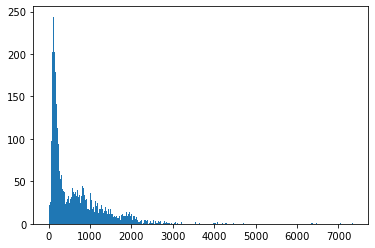

In [30]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [31]:
#verificando quantas notícias tem mais do que o número de palavras especificado
nos = np.array([len(x) for x in X])
len(nos[nos>2000])

311

In [32]:
maxlen = 2000
X = pad_sequences(X, maxlen=maxlen)

In [33]:
vocab_size = len(tokenizer.word_index) + 1 #verificar novamente em 1h09 o pq do "+1"
vocab = tokenizer.word_index

In [34]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [35]:
embedding_vectors = get_weight_matrix(w2v_model)

### Criando o modelo de rede neural

In [36]:
#colocar trainable = True pra ver se melhora o resultado se a ML ficar retrinando
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 100)         8998800   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,116,177
Trainable params: 117,377
Non-trainable params: 8,998,800
_________________________________________________________________


### Treinando o modelo

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
model.fit(X_train, y_train, validation_split=0.1, epochs=6)

Epoch 1/6
152/152 [==============================] - 454s 3s/step - loss: 0.6380 - acc: 0.6389 - val_loss: 0.6212 - val_acc: 0.5981
Epoch 2/6
152/152 [==============================] - 414s 3s/step - loss: 0.5765 - acc: 0.6938 - val_loss: 0.7817 - val_acc: 0.6185
Epoch 3/6
152/152 [==============================] - 418s 3s/step - loss: 0.5464 - acc: 0.7261 - val_loss: 0.4815 - val_acc: 0.7722
Epoch 4/6
152/152 [==============================] - 414s 3s/step - loss: 0.3349 - acc: 0.8644 - val_loss: 0.6232 - val_acc: 0.6296
Epoch 5/6
152/152 [==============================] - 410s 3s/step - loss: 0.2913 - acc: 0.8759 - val_loss: 0.1351 - val_acc: 0.9685
Epoch 6/6
152/152 [==============================] - 412s 3s/step - loss: 0.1373 - acc: 0.9570 - val_loss: 0.1247 - val_acc: 0.9685


In [40]:
y_pred = (model.predict(X_test) >=0.5).astype(int)

In [41]:
accuracy_score(y_test, y_pred)

0.9594444444444444

In [71]:
def saveModel(model,dicto):
    name = input('nome do modelo:')
    model.save(str(name)+'.h5')
    with open('wordIndex.json','w') as f:
        json.dump(dicto,f,indent = "")
    print('Model saved!')
    return

In [72]:
saveModel(model, vocab)

nome do modelo:modelo96
Model saved!


### Vasculhador de notícias para testes

In [116]:
noticia = X_train[0].tolist()  #notícia teste ou treino a ser analisada

In [117]:
vocab = tokenizer.word_index
vocab[""] = 0
inv_vocab = {v: k for k, v in vocab.items()}

In [118]:
news=[]
for token in noticia:
    news.append(inv_vocab[token])  #inv_vocab[token] é a palavra correspondente ao token.

In [119]:
noticia_ok = ' '.join([str(item) for item in news])
print(noticia_ok)

In [111]:
df_true['texto'][4]

'gustavo pedreira ferraz, que admitiu buscar malas de dinheiro para geddel vieira lima, afirmou à pf ter trabalhado na campanha presidencial de 2014 para o então candidato aécio neves (psdb). ex-diretor da defesa civil de salvador, bahia, ele resolveu colaborar com investigações sobre o bunker dos r$ 51 milhões. as digitais de ferraz foram encontradas nas cédulas de r$ 50 e r$ 100 que rechearam as malas e caixas de dinheiro encontradas na maior apreensão da história da pf. por meio de sua assessoria, o senador nega que gustavo tenha trabalhado em sua campanha.\nconselheiro de ética do pmdb na bahia, ferraz admitiu que, em 2012, buscou uma mala de dinheiro para em um hotel em são paulo para o ex-ministro. ele afirma que ainda voltou a salvador em voo fretado e foi levado por um motorista do pmdb até a casa de geddel, aonde o dinheiro da mala foi contado. ferraz se diz traído já que esperava que o ex-ministro repassasse o montante para as campanhas de candidatos baianos às prefeituras e,